Notes:
    
    

In [1]:
import tensorflow as tf
import lib.data_loader as data_loader
import lib.plot_learning_curves as plot_learning_curves
import models.base_model as base_model
import models.densenet as densenet
import models.resnet as resnet
import models.inception_v3 as inception
import models.xception as xception
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.image as mpimg
# from tqdm import tqdm
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import random, os
import numpy as np
import pandas as pd
import json

# import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob
import gc
# from skimage.transform import resize
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

from sklearn.metrics import f1_score, recall_score, precision_score

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
! pip install -q -U keras-tuner
import keras_tuner as kt

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.0
Train model
Tensorflow version 2.4.0
Tensorflow version 2.4.0
Tensorflow version 2.4.0
Tensorflow version 2.4.0
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Tensorflow version 2.4.0


In [2]:
# mount data
data_path = 'data/MURA-v1.1/'
directory = 'data/'
! pwd
train_generators, valid_generators, test_generators, test=data_loader.load_all("noaugment")

/tf

Import train and test data

No data augmentation

Create training, validation and test set

Found 33021 validated image filenames.
Found 3787 validated image filenames.
Found 3197 validated image filenames.
Data munging completed


# Resnet

In [3]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [4]:
bodypart = '14classes'
# for bodypart in bodyparts:
print(bodypart)
print("\nBuild model\n")
model =  resnet.build_model_on_resnet_14classes()
print('\nTrain model\n')
print(bodypart)
history = resnet.train_model_14classes(model, 
                                     valid_generators,
                                     train_generators,
                                     50)
print('\nSave training history\n')
with open("data/history/history_resnet_14classes_top_50epochs_noaugment_fixed_softmax.json", "w") as file:
    json.dump(history.history, file)
    print('\nSave model\n')
model.save("data/models/resnet_14classes_top_50epochs_noaugment_fixed_softmax")
model.save("data/models/resnet_14classes_top_50epochs_noaugment_fixed_softmax.h5")

14classes

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 14)                28686     
Total params: 58,399,630
Trainable params: 28,686
Non-trainable params: 58,370,944
_________________________________________________________________

Train model

14classes
Using validation_steps = 15
Using steps_per_epoch = 65
Epoch 1

In [5]:
model.evaluate(test_generators, verbose=1)

100/100 [==============================] - 731s 7s/step - loss: 2.4876 - accuracy: 0.2061


[2.4875566959381104, 0.2061307430267334]

In [9]:
model.evaluate(train_generators, verbose=1)

1032/1032 [==============================] - 8524s 8s/step - loss: 2.2259 - accuracy: 0.2809


[2.2259113788604736, 0.280942440032959]

In [8]:
model.evaluate(valid_generators, verbose=1)

119/119 [==============================] - 941s 8s/step - loss: 2.2484 - accuracy: 0.2741


[2.248436689376831, 0.2740955948829651]

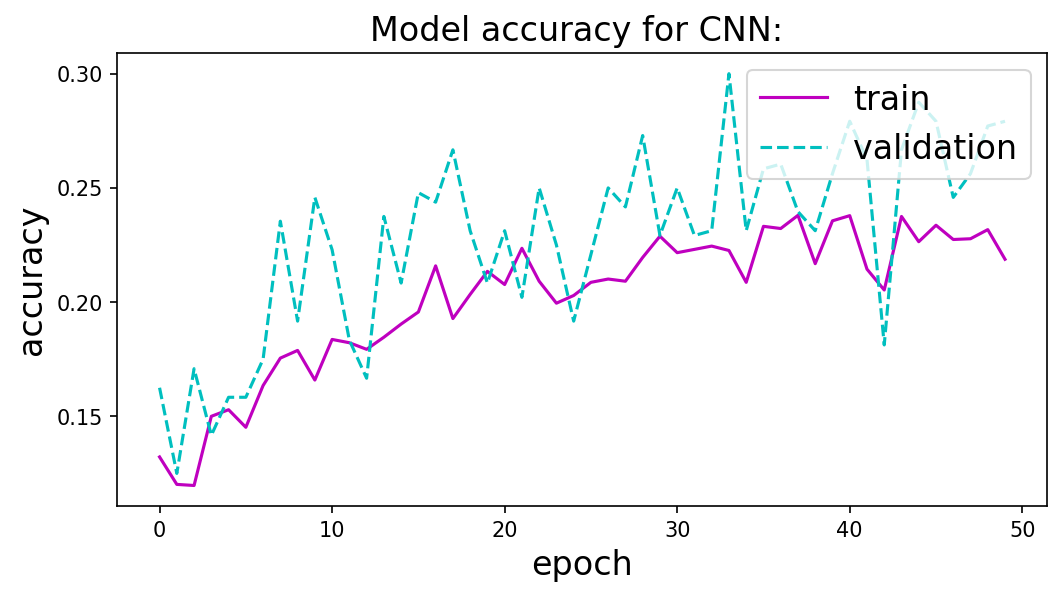

<Figure size 432x288 with 0 Axes>

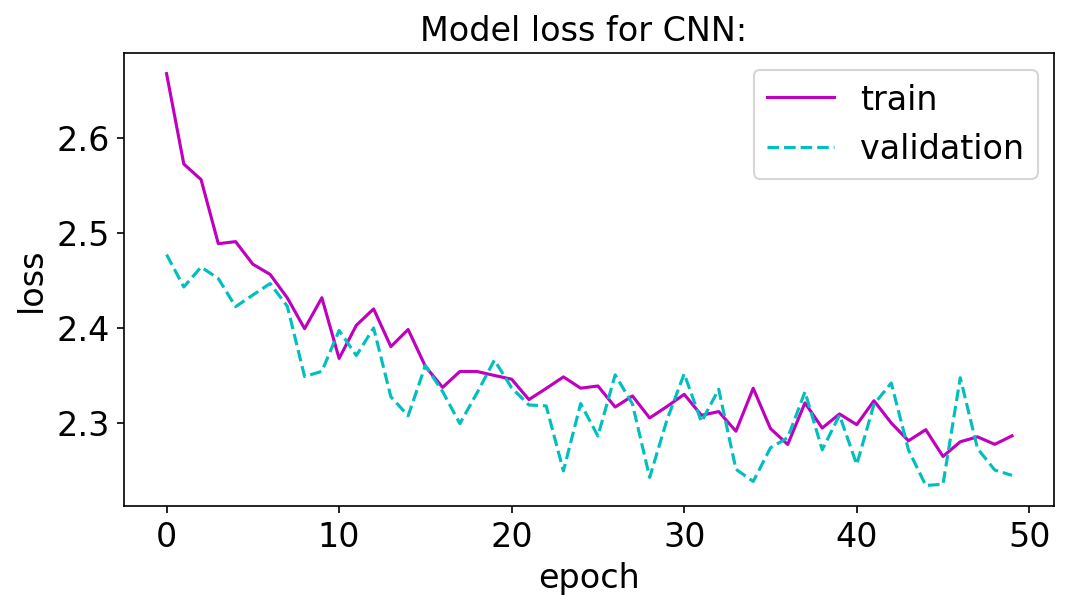

<Figure size 432x288 with 0 Axes>

In [7]:
plot_learning_curves.plot_history_all(history, 
                                     'resnet_14classes_model_top_fixed_softmax',
                                     50,
                                     data_augmentation='noaugment')